<a href="https://colab.research.google.com/github/marquesgabi/Doutorado/blob/master/ANN_segmentacao_tensor_OUR_v13_junho_08_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import zipfile
#import random
from random import randint
from PIL import Image
import re
from sklearn.model_selection import train_test_split
#import scikit-image
import skimage
import pandas as pd

In [2]:
!pip install mahotas

     |████████████████████████████████| 1.5MB 2.7MB/s 
  Created wheel for mahotas: filename=mahotas-1.4.9-cp36-cp36m-linux_x86_64.whl size=4265657 sha256=da24990efc527a845683f5b397bc763c8ff758ed6164ca61944b8ab09b96494e
  Stored in directory: /root/.cache/pip/wheels/02/e7/50/b67eee3b19c479cc5b41f10230bf9c1556be6eaaf095c6e997
Successfully built mahotas


In [0]:
import mahotas.features.texture as mht
import mahotas.features

In [4]:
!git clone https://github.com/ucfilho/marquesgabi_fev_2020 #clonar do Github
%cd marquesgabi_fev_2020

import Go2BlackWhite
import Go2Mahotas

Cloning into 'marquesgabi_fev_2020'...
remote: Enumerating objects: 73, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 73 (delta 37), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (73/73), done.
/content/marquesgabi_fev_2020


In [0]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

In [6]:
''''''
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado
Transfere='Fotos9Amostras720_e_varios_graos.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()


Cloning into 'Doutorado'...
remote: Enumerating objects: 250, done.
remote: Total 250 (delta 0), reused 0 (delta 0), pack-reused 250
Receiving objects: 100% (250/250), 70.39 MiB | 41.43 MiB/s, done.
Resolving deltas: 100% (123/123), done.
/content/marquesgabi_fev_2020/Doutorado


In [0]:
#Construção da rede com as fotos já recortadas anteriormente
labels = [] #720 imagens recortadas por nós
images = [] #720 imagens lidas no formato de lista array
with zipfile.ZipFile(Transfere, "r") as f:
  for f in f.namelist():
    images.append(cv2.imread(f))
    labels.append(f)


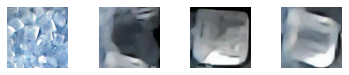

In [8]:
# Import the 'pyplot' module of 'matplotlib'
import matplotlib.pyplot as plt

# Determine the (random) indexes of the images that you want to see 
traffic_signs = [25, 30, 36, 40]

# Fill out the subplots with the random images that you defined 
for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)

plt.show()

In [0]:
# Import the `transform` module from `skimage`
from skimage import transform 

# Rescale the images in the `images` array
images28 = [transform.resize(image, (28, 28)) for image in images]

In [0]:
# Import `rgb2gray` from `skimage.color`
from skimage.color import rgb2gray

# Convert `images28` to an array
images28 = np.array(images28)

# Convert `images28` to grayscale
images28 = rgb2gray(images28)

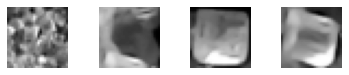

In [11]:
for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images28[traffic_signs[i]], cmap="gray")
    plt.subplots_adjust(wspace=0.5)
    
# Show the plot
plt.show()

In [12]:
y_valor=[]

img_name=labels

Graos='G' # numero 1
Indef='I' # numero 2
Buraco='B' # numero 3
Varios='V' # numero 4

for x in img_name:
  if re.search(Graos, x):
    y_valor.append(1)
  elif re.search(Indef, x):
    y_valor.append(2)
  elif re.search(Buraco, x):
    y_valor.append(3)
  else:
    y_valor.append(4)
    
print(y_valor)
print(len(y_valor))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 3, 3, 3, 

In [0]:
#sparse_softmax_cross_entropy_with_logits()

In [0]:

W_train, W_test, yw_train, yw_test = train_test_split(np.array(images28), np.array(y_valor), 
                                                    test_size=0.30, 
                                                    random_state=42)

In [15]:
print(len(yw_train))
print(len(yw_test))

617
265


In [0]:
train_images=W_train
train_labels=yw_train
test_images=W_test
test_labels=yw_test

In [0]:

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [0]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [19]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
20/20 [==============================] - 0s 2ms/step - loss: 1.4150 - accuracy: 0.4019
Epoch 2/10
20/20 [==============================] - 0s 2ms/step - loss: 1.0720 - accuracy: 0.5413
Epoch 3/10
20/20 [==============================] - 0s 2ms/step - loss: 0.9613 - accuracy: 0.6305
Epoch 4/10
20/20 [==============================] - 0s 2ms/step - loss: 0.8577 - accuracy: 0.6515
Epoch 5/10
20/20 [==============================] - 0s 2ms/step - loss: 0.7970 - accuracy: 0.6856
Epoch 6/10
20/20 [==============================] - 0s 2ms/step - loss: 0.7709 - accuracy: 0.6564
Epoch 7/10
20/20 [==============================] - 0s 2ms/step - loss: 0.7235 - accuracy: 0.7180
Epoch 8/10
20/20 [==============================] - 0s 2ms/step - loss: 0.6924 - accuracy: 0.7293
Epoch 9/10
20/20 [==============================] - 0s 2ms/step - loss: 0.6486 - accuracy: 0.7407
Epoch 10/10
20/20 [==============================] - 0s 2ms/step - loss: 0.6407 - accuracy: 0.7423


In [20]:
'''
predictions = model.predict(train_images) #x_test[:3])
print('predictions shape:', predictions.shape)
'''

"\npredictions = model.predict(train_images) #x_test[:3])\nprint('predictions shape:', predictions.shape)\n"

In [0]:
#print(predictions)

In [0]:
#print(train_images.shape)

In [23]:
'''
result = model.evaluate(train_images) # esta estranho
print(result)
result = model.predict(train_images) # esta estranho
print(result)
'''

'\nresult = model.evaluate(train_images) # esta estranho\nprint(result)\nresult = model.predict(train_images) # esta estranho\nprint(result)\n'

In [0]:
Size=1200 # tamanho da foto
Sub_Size=int(Size/5) # tamanho do fracionamento
Row_Crop=1/2 # posicao do corte
Crop=int(Size*Row_Crop)

In [0]:
Transfere='Fotos_Grandes_3cdAmostra.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

In [0]:
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size) #Pegamos a primeira foto Grande
img=ww[0]

In [27]:
print(img.shape)

(1200, 1200)


In [28]:
x=images28
logits = model(x, training=False)
prediction = tf.argmax(logits, axis=1, output_type=tf.int32)
print(prediction)

tf.Tensor(
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 2 1 1 2 2 2 3 3 3 3 3 3 3 2 3 1
 1 1 1 1 1 1 1 1 1 2 2 2 2 1 2 1 2 2 2 1 1 2 2 1 1 3 3 2 2 2 3 3 3 3 3 1 1
 1 1 2 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2 1 2 4 2 2 2 3 2 3 3 3 3 3 3 2 1 1 1
 1 1 1 1 4 1 1 2 2 2 2 1 2 2 2 2 2 2 2 2 1 1 2 3 3 3 3 3 3 2 3 3 3 1 2 1 1
 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 2 2 2 2 2 3 2 3 3 2 2 3 3 2 3 1 1 1 1 1 1 1 1 1 1 2 2 2 1 2 2
 2 2 2 2 2 2 1 2 2 2 3 2 3 2 3 3 2 3 2 2 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2
 2 1 2 2 2 1 1 2 2 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 4 2 2 2 1 1 2 3
 3 2 3 2 3 3 3 3 1 2 1 1 1 2 1 1 1 1 2 2 2 2 1 2 2 2 2 2 1 1 2 2 2 1 3 3 2
 3 3 3 3 3 2 3 1 1 1 1 1 1 1 1 1 1 2 2 2 2 1 2 1 2 2 2 2 2 1 2 2 2 1 1 1 1
 1 1 1 1 1 2 1 1 1 2 1 1 1 1 1 2 2 2 2 2 2 2 3 2 3 2 3 2 3 3 2 3 1 1 1 1 1
 1 1 1 1 2 2 1 1 1 2 2 2 2 2 2 2 4 1 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 4 2 2 2 2 2 3 3 2 2 3 3 3 2 3 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 1 2
 2 2 1 1 1 1 4

In [29]:
data = {'y_Actual': y_valor,
        'y_Predicted': prediction
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
print (df)

     y_Actual  y_Predicted
0           1            1
1           1            1
2           1            1
3           1            1
4           1            1
..        ...          ...
877         4            1
878         4            1
879         4            2
880         4            1
881         4            1

[882 rows x 2 columns]


In [30]:
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)

Predicted    1    2    3   4
Actual                      
1          339   19    1   1
2           26  154    0   0
3            1   35  142   2
4           68   80    1  13


In [31]:
import sklearn
y_true = df['y_Actual']
y_pred = df['y_Predicted']

print(sklearn.metrics.classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           1       0.78      0.94      0.85       360
           2       0.53      0.86      0.66       180
           3       0.99      0.79      0.88       180
           4       0.81      0.08      0.15       162

    accuracy                           0.73       882
   macro avg       0.78      0.67      0.63       882
weighted avg       0.78      0.73      0.69       882



In [0]:
# Segmentation: start here......

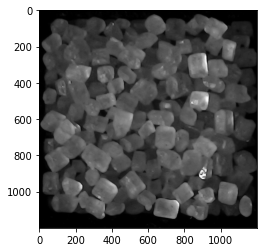

In [33]:
plt.imshow(img, cmap = "gray")

In [0]:
a=0
b=1200
c=100
d=200
Num=50
ww=[]
label=[]

for i in range(Num):
  #x=random.randint(a, b)
  #y=random.randint(a, b)
  #Width=random.randint(c, d)
  x=randint(a, b)
  y=randint(a, b)
  Width=randint(c, d)
  img_1st=np.zeros((Width,Width)).astype(np.int64)

  for i in range(Width):
    for j in range(Width):

      size_x=Width+x
      size_y=Width+y
    
      if(size_x>=Size):
        x=Size-Width

      if(size_y>= Size):
        y=Size-Width

      img_1st[i,j]=np.copy(img[i+y,j+x])
  ww.append(img_1st)
  nome = "W=" + str(Width)+" x="+str(x)+" y="+str(y)
  label.append(nome)


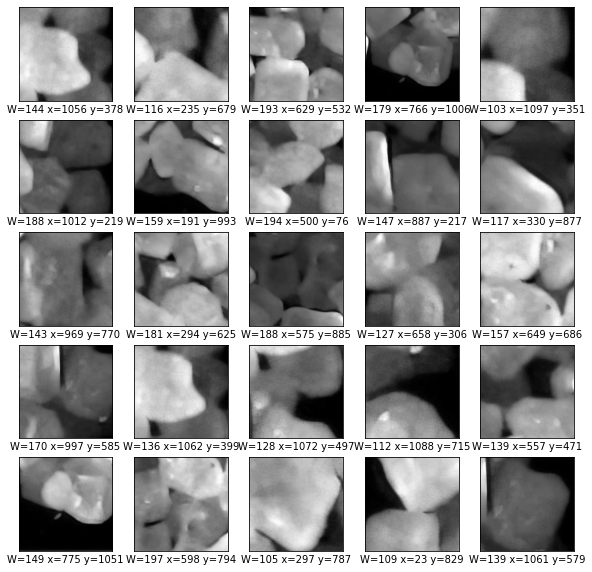

In [35]:
Num=25
plt.figure(figsize=(10,10))
for i in range(Num):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(ww[i], cmap = "gray")
    plt.xlabel(label[i])
plt.show()


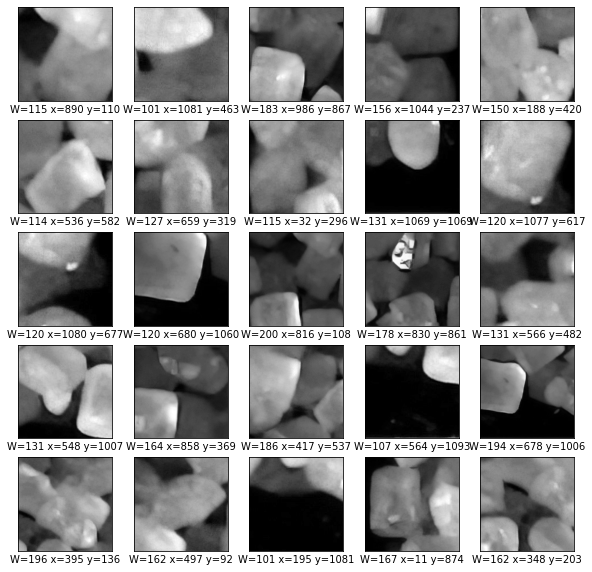

In [36]:
Num=25
plt.figure(figsize=(10,10))
for i in range(Num):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(ww[i+25], cmap = "gray")
    plt.xlabel(label[i+25])
plt.show()

In [37]:
print(label)

['W=144 x=1056 y=378', 'W=116 x=235 y=679', 'W=193 x=629 y=532', 'W=179 x=766 y=1006', 'W=103 x=1097 y=351', 'W=188 x=1012 y=219', 'W=159 x=191 y=993', 'W=194 x=500 y=76', 'W=147 x=887 y=217', 'W=117 x=330 y=877', 'W=143 x=969 y=770', 'W=181 x=294 y=625', 'W=188 x=575 y=885', 'W=127 x=658 y=306', 'W=157 x=649 y=686', 'W=170 x=997 y=585', 'W=136 x=1062 y=399', 'W=128 x=1072 y=497', 'W=112 x=1088 y=715', 'W=139 x=557 y=471', 'W=149 x=775 y=1051', 'W=197 x=598 y=794', 'W=105 x=297 y=787', 'W=109 x=23 y=829', 'W=139 x=1061 y=579', 'W=115 x=890 y=110', 'W=101 x=1081 y=463', 'W=183 x=986 y=867', 'W=156 x=1044 y=237', 'W=150 x=188 y=420', 'W=114 x=536 y=582', 'W=127 x=659 y=319', 'W=115 x=32 y=296', 'W=131 x=1069 y=1069', 'W=120 x=1077 y=617', 'W=120 x=1080 y=677', 'W=120 x=680 y=1060', 'W=200 x=816 y=108', 'W=178 x=830 y=861', 'W=131 x=566 y=482', 'W=131 x=548 y=1007', 'W=164 x=858 y=369', 'W=186 x=417 y=537', 'W=107 x=564 y=1093', 'W=194 x=678 y=1006', 'W=196 x=395 y=136', 'W=162 x=497 y=92

In [0]:
#img = ww[0].reshape((28,28))
#ww[0].shape
#ww[0].size

In [39]:
print(np.array(ww[0]))

[[54 53 53 ...  1  1  1]
 [52 50 50 ...  1  1  0]
 [51 52 49 ...  2  1  1]
 ...
 [61 60 60 ... 32 28 20]
 [62 62 61 ... 32 29 23]
 [62 61 61 ... 32 28 23]]


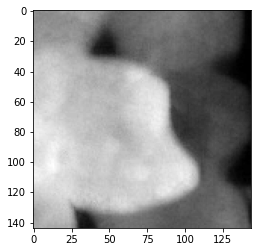

In [40]:
plt.imshow(ww[0], cmap = "gray")

In [41]:
Num=50
Size=28
img28_all=[]
for i in range(Num):
  data=np.array(ww[i])
  img = Image.fromarray(data.astype('uint8'), mode='L')
  img=np.float32(img)
  img28=cv2.resize(img,(Size,Size), interpolation = cv2.INTER_AREA)
  img28_all.append(img28)

img28_all=np.array(img28_all)
print(img28_all.shape)


(50, 28, 28)


In [42]:
x=img28_all
logits = model(x, training=False)
prediction_all = tf.argmax(logits, axis=1, output_type=tf.int32)
print(prediction_all)


tf.Tensor(
[4 2 2 1 1 3 1 2 4 4 2 2 3 4 2 4 1 3 3 3 1 2 1 2 1 2 2 1 3 2 1 4 2 2 1 3 4
 3 2 3 1 1 4 3 1 1 2 3 1 3], shape=(50,), dtype=int32)


In [0]:
Graos='G' # numero 1
Indef='I' # numero 2
Buraco='B' # numero 3
Varios='V' # numero 4

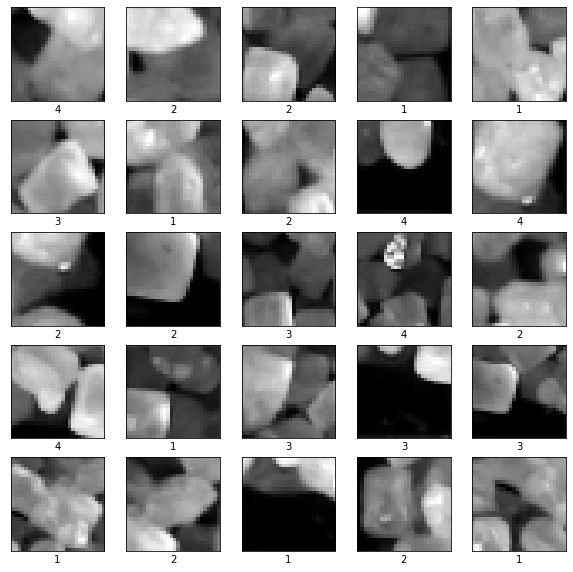

In [44]:
Num=25
y_all=np.array(prediction_all)
plt.figure(figsize=(10,10))
for i in range(Num):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img28_all[i+25], cmap = "gray")
    label_all=y_all[i]
    plt.xlabel(label_all)
plt.show()